In [1]:
# Generic imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import PIL
import os
from scipy.special import gamma
import scipy.optimize as optimization

# Local imports
import sys
sys.path.append('../../../')
import stlstuff as sls
import imagestuff as ims
import statstuff as sts

# # Development
# from importlib import reload
# reload(sts)

In [2]:
%matplotlib notebook

In [3]:
# Graphics parameters
fontsize = 10
linewidth = 2
matplotlib.rcParams.update({'font.size': fontsize})

In [4]:
# Set defaults for the analysis
accumlist = [] # This will be all segments unless overridden 

# Only turn this on if we want PDF in terms of Z^2
IwantZ2intervals = True
Iwantlogrintervals = True

if (IwantZ2intervals):
    numforZ2hist = 25
    Z2minforhist = 1e-4; #print(Z2minforhist)
    rmaxforZ2hist = 0.1; Z2maxforhist = 1/(1-rmaxforZ2hist)**2-1; print(Z2maxforhist)
    Z2maxforhist = 0.25; #print(Z2maxforhist)
    
if (Iwantlogrintervals):
    numforhist = 50
    rminforhist = 1e-7
    rmaxforhist = .6

0.23456790123456783


In [5]:
# Specify the file we want to analyze (and output file name)
pwd = os.getcwd()
print(pwd)
startpos = pwd.find('crystals/')
case = pwd[startpos+9:]; print(case)
Segmentroot='Segments2'

/Users/katiegray/ice4/crystals/2018-07-05 /Case2.2
2018-07-05 /Case2.2


In [6]:
# Derivative names
Compressedfilename = Segmentroot+'retrieved.npz'; print (Compressedfilename)
Roughnessfile = Segmentroot+'roughness.jpg'; print(Roughnessfile)
RoughnessZ2file = Segmentroot+'roughnessZ2.jpg'; print(RoughnessZ2file)
RoughnessZ2datafile = Segmentroot+'roughnessZ2.txt'; print(RoughnessZ2datafile)
Roughnessdatafile=Segmentroot+'roughness.txt'; print(Roughnessdatafile)
Roughnessfitfile=Segmentroot+'roughnessfit.txt'; print(Roughnessfitfile)

Segments2retrieved.npz
Segments2roughness.jpg
Segments2roughnessZ2.jpg
Segments2roughnessZ2.txt
Segments2roughness.txt
Segments2roughnessfit.txt


In [7]:
# Get the retrieved surface
npzfile = np.load(Compressedfilename)
imageroot = np.array_str(npzfile['imageroot'])
dx,dy,cA,cB,cC,cD,Filename = ims.getc2('', 'SEMimages/', imageroot)
print("dx and dy", dx, dy)

dx and dy 0.5669643 0.5669643


In [8]:
# Setting up windows for where the data are, and the accumulation array
nx1list = npzfile['nx1list']
nx2list = npzfile['nx2list']
ny1list = npzfile['ny1list']
ny2list = npzfile['ny2list']
solution = npzfile['solution']
nsegments = len(nx1list)
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)] 
print('Completed',case) #Prints loading but I wanted to know when it was done.

Completed 2018-07-05 /Case2.2


<IPython.core.display.Javascript object>


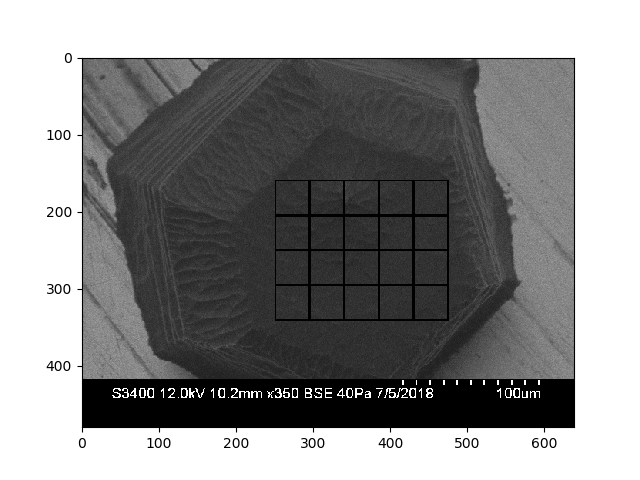

In [9]:
# Graph the segments
im = PIL.Image.open(Filename)
ny_im,nx_im = np.shape(im)
draw = PIL.ImageDraw.Draw(im)
for i in range(nsegments):
    nx1 = nx1list[i]
    nx2 = nx2list[i]
    ny1 = ny1list[i]
    ny2 = ny2list[i]
    ims.myrectangle(draw,(nx1,ny1),(nx2,ny2),2)
    
plt.imshow(np.asarray(im), cmap = 'Greys_r', vmin = 0, vmax = 255)

In [10]:
# Get the histogram as a function of log(r)
if (Iwantlogrintervals):
    newrbins=np.geomspace(rminforhist,rmaxforhist,num=numforhist)
    hbins_total, rbinsW = sts.makehistogram(\
                                 nsegments,nx1list,nx2list,ny1list,ny2list,dx,dy,solution,\
                                 accumlist, newrbins)

../../../imagestuff.py:204: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, _, _, _ = np.linalg.lstsq(G, z)


Accumulating ... 1 out of 20
Accumulating ... 2 out of 20
Accumulating ... 3 out of 20
Accumulating ... 4 out of 20
Accumulating ... 5 out of 20
Accumulating ... 6 out of 20
Accumulating ... 7 out of 20
Accumulating ... 8 out of 20
Accumulating ... 9 out of 20
Accumulating ... 10 out of 20
Accumulating ... 11 out of 20
Accumulating ... 12 out of 20
Accumulating ... 13 out of 20
Accumulating ... 14 out of 20
Accumulating ... 15 out of 20
Accumulating ... 16 out of 20
Accumulating ... 17 out of 20
Accumulating ... 18 out of 20
Accumulating ... 19 out of 20
Accumulating ... 20 out of 20
Norm = 32.93192099028062


Gaussian: best_sigma =  0.25369775843307263
Weibull: best_sigma =  0.25144726275174445
Weibull: best_eta =  0.8743131400114335
Bimodal: best_sigma1,N1 =  0.22137994141937187 0.7285526934617197
Bimodal: best_sigma2,N2 =  0.39885361616179066 0.2714473065382803
R^2 (Gauss) =  0.975360384274129
R^2 (Weibull) =  0.9931986508181205
R^2 (Bimodal) =  0.998841984496202


<IPython.core.display.Javascript object>


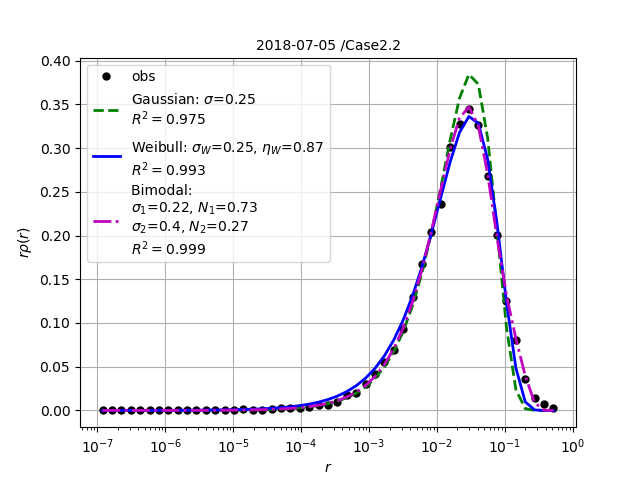

In [11]:
# Analysis of this histogram
if (Iwantlogrintervals): 
    # Get the best Weibull fit
    x0 = np.array([0.1])
    fsolution, fsolutionerror = optimization.curve_fit(sts.pGaussianr, rbinsW, hbins_total, x0)
    best_sigmaG = fsolution[0]; 
    print('Gaussian: best_sigma = ', best_sigmaG)

    # Get the best Weibull fit
    x0 = np.array([0.1,1.0])
    fsolution, fsolutionerror = optimization.curve_fit(sts.pWeibullr, rbinsW, hbins_total, x0)
    best_sigmaW = fsolution[0]; 
    print('Weibull: best_sigma = ', best_sigmaW)
    best_eta = fsolution[1]
    print('Weibull: best_eta = ', best_eta)

    # Get the best match for a two-gaussian fit
    x0 = np.array([0.09,0.24,.5])
    fsolution, fsolutionerror = optimization.curve_fit(sts.bimodalfunc, rbinsW, hbins_total, x0)
    best_sigma1 = fsolution[0]
    best_N1 = 1-fsolution[2]
    print('Bimodal: best_sigma1,N1 = ', best_sigma1,best_N1)
    best_sigma2 = fsolution[1]
    best_N2 = fsolution[2]
    print('Bimodal: best_sigma2,N2 = ', best_sigma2,best_N2)
    
        # Get the best-fit distributions
    hbins_gauss = sts.pWeibullr(rbinsW, best_sigmaG, 1)
    R2_G = sts.R_squar(hbins_total,hbins_gauss)
    print('R^2 (Gauss) = ', R2_G)
    hbins_bestfit = sts.pWeibullr(rbinsW, best_sigmaW, best_eta)
    R2_W = sts.R_squar(hbins_total,hbins_bestfit)
    print('R^2 (Weibull) = ', R2_W)
    hbins_bimodal = sts.bimodalfunc(rbinsW, best_sigma1, best_sigma2, best_N2)
    R2_B = sts.R_squar(hbins_total,hbins_bimodal)
    print('R^2 (Bimodal) = ', R2_B)
    
    # Labels for graph
    label_obs = 'obs'
    label_Gauss = 'Gaussian: ' \
                    +'$\sigma$='+str(np.round(best_sigmaG*100)/100) + '\n'\
                    +'$R^2=$'+str(np.round(R2_G*1000)/1000) 
    label_Weibull = 'Weibull: ' \
                    +'$\sigma_W$='+str(np.round(best_sigmaW*100)/100) \
                    +', ' +'$\eta_W$='+str(np.round(best_eta*100)/100) + '\n'\
                    +'$R^2=$'+str(np.round(R2_W*1000)/1000) 

    label_bimodal = 'Bimodal: ' + '\n'\
                    +'$\sigma_1$='+str(np.round(best_sigma1*100)/100) \
                    +', '+'$N_1$='+str(np.round(best_N1*100)/100) + '\n'\
                    +'$\sigma_2$='+str(np.round(best_sigma2*100)/100) \
                    +', '+'$N_2$='+str(np.round(best_N2*100)/100) + '\n'\
                    +'$R^2=$'+str(np.round(R2_B*1000)/1000) 

    # Graph
    plt.figure()
    plt.semilogx(rbinsW,hbins_total,'ok',markersize=5, label=label_obs)
    plt.semilogx(rbinsW,hbins_gauss,'--g',linewidth=2, label=label_Gauss)
    plt.semilogx(rbinsW,hbins_bestfit,'-b',linewidth=2, label=label_Weibull)
    plt.semilogx(rbinsW,hbins_bimodal,'-.m',linewidth=2, label=label_bimodal)
    plt.grid(True)
    plt.xlabel(r'$r$',fontsize=fontsize)
    plt.ylabel(r'$r\rho(r)$',fontsize=fontsize)
    plt.legend(loc='upper left')
    plt.title(case,fontsize=fontsize)
    
    plt.savefig(Roughnessfile)
    dummy= [rbinsW,hbins_total]
    np.savetxt(Roughnessdatafile,dummy)
    cfile = open(Roughnessfitfile,'w')
    cfile.write('&Roughness_Best_Fit\n')
    cfile.write(case+'\n\n'+'Gaussian fit:'+'\n')
    cfile.write('   '+'sigma =' +str(best_sigmaG)+'\n')
    cfile.write('   '+'R^2 ='+str(R2_G)+'\n\n'+'Weibull fit:'+'\n')
    cfile.write('   '+'sigma =' +str(best_sigmaW)+'\n')
    cfile.write('   '+'eta =' +str(best_eta)+'\n')
    cfile.write('   '+'R^2 ='+str(R2_W)+'\n\n'+'Bimodal fit:'+'\n')
    cfile.write('   '+'sigma1 =' +str(best_sigma1)+'\n')
    cfile.write('   '+'N1 =' +str(best_N1)+'\n')
    cfile.write('   '+'sigma2 =' +str(best_sigma2)+'\n')
    cfile.write('   '+'N2 =' +str(best_N2)+'\n')
    cfile.write('   '+'R^2 ='+str(R2_B)+'\n')
    cfile.close()

In [12]:
# Get the histogram as a function of Z2
if (IwantZ2intervals):

    # This calculates a normalized observed PDF as a function of Z^2 (rho(Z^2))
    newZ2bins = np.linspace(Z2minforhist,Z2maxforhist,numforZ2hist)
    newrbins = 1-(1/(newZ2bins+1))**.5

    hbins_total, rbinsW = sts.makehistogram(\
                                 nsegments,nx1list,nx2list,ny1list,ny2list,dx,dy,solution,\
                                 accumlist, newrbins)

../../../imagestuff.py:204: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, _, _, _ = np.linalg.lstsq(G, z)


Accumulating ... 1 out of 20
Accumulating ... 2 out of 20
Accumulating ... 3 out of 20
Accumulating ... 4 out of 20
Accumulating ... 5 out of 20
Accumulating ... 6 out of 20
Accumulating ... 7 out of 20
Accumulating ... 8 out of 20
Accumulating ... 9 out of 20
Accumulating ... 10 out of 20
Accumulating ... 11 out of 20
Accumulating ... 12 out of 20
Accumulating ... 13 out of 20
Accumulating ... 14 out of 20
Accumulating ... 15 out of 20
Accumulating ... 16 out of 20
Accumulating ... 17 out of 20
Accumulating ... 18 out of 20
Accumulating ... 19 out of 20
Accumulating ... 20 out of 20
Norm = 72.75487021645016


<IPython.core.display.Javascript object>


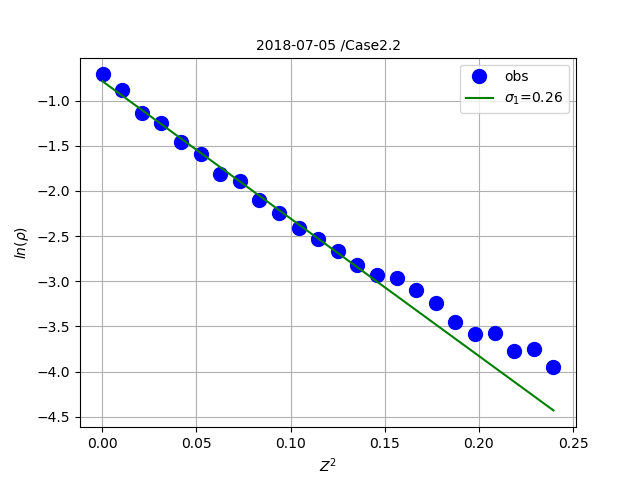

[-15.20842291  -0.78590115] predicted sigma1 =  0.2564235507215165
t1= 14.086640223439192
t2= 20.864096040067576


In [14]:
# Analysis of this histogram
if (IwantZ2intervals):

    # Do some fixing
    ikeep = np.nonzero(hbins_total)
    Z2keep = newZ2bins[ikeep]; #print(Z2keep)
    logrhoZ2 = np.log(hbins_total[ikeep]); #print(logrhoZ2)
    
    # Graph the Z^2 PDF
    plt.figure()
    plt.plot(Z2keep,logrhoZ2,'ob',markersize=10, label='obs')

    # Do some polyfitting
    thisrange = [i for i in range(0,15)]
    p1 = np.polyfit(Z2keep[thisrange],logrhoZ2[thisrange],1)
    best_sigma1 = 1/np.sqrt(-p1[0])
    print(p1,'predicted sigma1 = ', best_sigma1)
    label_sigma1 = '$\sigma_1$='+str(np.round(best_sigma1*100)/100) 
    plt.plot(Z2keep,np.polyval(p1,Z2keep),'g', label=label_sigma1)
    
#     n = len(Z2keep)
#     thisrange = [i for i in range(n-15,n)]
#     p2 = np.polyfit(Z2keep[thisrange],logrhoZ2[thisrange],1)
#     best_sigma2 = 1/np.sqrt(-p2[0])
#     print(p2,'predicted sigma2 = ', best_sigma2)
#     label_sigma2 = '$\sigma_2$='+str(np.round(best_sigma2*100)/100) 
#     plt.plot(Z2keep,np.polyval(p2,Z2keep),'m', label=label_sigma2)
        
    # Annotate
    plt.grid(True)
#     plt.xlim([-.005,.06])
#     plt.ylim([-8,-1])
    plt.xlabel('$Z^2$')
    plt.ylabel(r'$ln(\rho)$')
    plt.title(case,fontsize=fontsize)
    plt.legend()

    # Save
    np.savetxt(RoughnessZ2datafile,np.transpose([Z2keep,logrhoZ2]))
    plt.savefig(RoughnessZ2file)

    # Reporting
    meanr1 = sts.sigma2meanr(best_sigma1); theta1 = np.arccos(1-meanr1)*180/np.pi; print('t1=',theta1)
    meanr2 = sts.sigma2meanr(best_sigma2); theta2 = np.arccos(1-meanr2)*180/np.pi; print('t2=',theta2)
#     for i in range(len(newrbins)):
#         print(i,newZ2bins[i],newrbins[i])
    

In [15]:
Z2 = .09; print(Z2)
r = 1-(1/(Z2+1))**.5; print(r)
theta = np.arccos(1-r)*180/np.pi; print(theta)

0.09
0.04217371477884868
16.69924423399364
